Problem Statement:

A dataset from `net` is given. Perform EDA operations and analyse the data so that which type of `Movies`or `TV shows` should be produced

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
net=pd.read_csv('C:/Users/pavillion/Desktop/murali/netflix/netflix.txt')
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


From above we can see that we have only one continous column `Duration`.

We can take `release_year` as categorical and continous as it can be used to find the count of movies and TV shows.

Hence we can convert all the columns into object type

In [5]:
net['release_year']=net['release_year'].astype('object')
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   object
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: object(12)
memory usage: 825.8+ KB


In [6]:
net.isna().sum()/len(net)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

From above we can see the percentage of null values, in all the columns.

Null values are extremely high in `director` column.

Null values are almost non existent in columns:[`rating`,`duration`,`date_added`]

In [7]:
for i in net.columns:
    print(i,net[i].nunique())

show_id 8807
type 2
title 8807
director 4528
cast 7692
country 748
date_added 1767
release_year 74
rating 17
duration 220
listed_in 514
description 8775


From above we can see that the columns [`show_id`,`title`] are unique and have no null values.

So, we can start working on other columns

In [8]:
net.type.value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [9]:
net.type.isna().sum()

0

From here we can see that the data can be divided into two parts:

It contains nearly 70% Movies and 30% TV Shows.

It has no null values

In [10]:
net.director.value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [11]:
net.director.isna().sum()

2634

The `Director` column is a nested column and has null values.

In [12]:
net.cast.value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [13]:
net.cast.isna().sum()

825

The `cast` column also has both null values and nested values

In [14]:
net.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [15]:
net.country.isna().sum()

831

The column `country` also has both nested values and null values

In [16]:
net.date_added.value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [17]:
net.date_added.isna().sum()

10

The column `date_added` has null values.

In [18]:
net.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [19]:
net.release_year.isna().sum()

0

The column `release_year` has no null values

In [20]:
net.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

From above we can see that the values [`74 min`,`84 min`, `66 min`] should not be in the column `rating`

In [21]:
net.rating.isna().sum()

4

From above we can see that column `rating` has values from other columns and also null values.

In [22]:
net.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [23]:
net.duration.isna().sum()

3

We have 3 null values in `duration` column

In [24]:
net.listed_in.isna().sum()

0

In [25]:
net.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

The column `listed_in` has no null values.

In [26]:
net.description.value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
                                                                                                                                                            ..
Sent away to evade an arranged marriage, a 14-

In [27]:
net.description.isna().sum()

0

In [28]:
net[(net['rating']=='74 min')|(net['rating']=='84 min')|(net['rating']=='66 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [29]:
net.loc[5541,['rating','duration']]=net.loc[5541,['duration','rating']].values
net.loc[5794,['rating','duration']]=net.loc[5794,['duration','rating']].values
net.loc[5813,['rating','duration']]=net.loc[5813,['duration','rating']].values

In [30]:
net.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Since there are three values in rating with minutes corresponding to 3 null values in duration, I tried to swap them.

In [31]:
net.duration.isna().sum()

0

In [32]:
net.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [33]:
net.rating.fillna('NR',inplace=True)

In [34]:
net.rating.isna().sum()

0

In `Rating` column, we have rating `NR`, since `NR` means `No Rating`. 

I replaced null values in `rating` column with `NR`

In [35]:
net.date_added.value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [36]:
net[net.date_added.isnull()==True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


From above, we can see that all the rows with date_added as `null values` are `TV Shows` and their Directors are also `null`

In [37]:
net['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [38]:
net['date_added'][net['type']=='TV Show'].value_counts()

July 6, 2021          31
January 1, 2016       23
August 1, 2017        22
June 19, 2021         21
July 1, 2017          19
                      ..
July 20, 2019          1
July 18, 2019          1
July 6, 2019           1
July 5, 2019           1
September 13, 2018     1
Name: date_added, Length: 1051, dtype: int64

In [39]:
net['date_added'].mode()

0    January 1, 2020
dtype: object

In [40]:
net['date_added'][net['type']=='TV Show'].mode()

0    July 6, 2021
dtype: object

I imputed the null values in column `date_added` with `mode of net['date_added'][net['type']=='TV Show']` as all the types of shows aree `TV Show`

In [41]:
net.date_added.fillna(net['date_added'][net['type']=='TV Show'].mode()[0],inplace=True)

In [42]:
net.date_added.isna().sum()

0

In [43]:
net[net.date_added.isnull()==True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [44]:
net.isna().sum()/len(net)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [45]:
net_null=net[(net['director'].isnull())&(net['country'].isnull())&(net['cast'].isnull())]
print(net_null.info())
net_nnull=net[(net['director'].notnull())|(net['country'].notnull())|(net['cast'].notnull())]
print(net_nnull.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 3 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       96 non-null     object
 1   type          96 non-null     object
 2   title         96 non-null     object
 3   director      0 non-null      object
 4   cast          0 non-null      object
 5   country       0 non-null      object
 6   date_added    96 non-null     object
 7   release_year  96 non-null     object
 8   rating        96 non-null     object
 9   duration      96 non-null     object
 10  listed_in     96 non-null     object
 11  description   96 non-null     object
dtypes: object(12)
memory usage: 9.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8711 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8711 non-null   object
 1   type          8711 non-

In [46]:
net_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 3 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       96 non-null     object
 1   type          96 non-null     object
 2   title         96 non-null     object
 3   director      0 non-null      object
 4   cast          0 non-null      object
 5   country       0 non-null      object
 6   date_added    96 non-null     object
 7   release_year  96 non-null     object
 8   rating        96 non-null     object
 9   duration      96 non-null     object
 10  listed_in     96 non-null     object
 11  description   96 non-null     object
dtypes: object(12)
memory usage: 9.8+ KB


In [47]:
def unnest(df,ind,col):
    df_column=col.apply(lambda x:str(x).split(', ')).tolist()
    df_column=pd.DataFrame(df_column,index=ind)
    df_column=pd.DataFrame(df_column.stack()).reset_index()
    df_column.drop(columns='level_1',inplace=True)
    return df_column

In [48]:
net_country=unnest(net,net['show_id'],net['country'])
net_country.columns=['show_id','Country']
net_count=net.merge(net_country,on='show_id',how='inner')
net_count.Country.mode()

0    United States
dtype: object

In [49]:
net_count.head()
net_count['Country'][net_count['type']=='TV Show'].mode()

0    United States
dtype: object

In [50]:
net_count.head()
net_count['Country'][net_count['type']=='Movie'].mode()

0    United States
dtype: object

In [51]:
net_count.head()
net_count['Country'].mode()

0    United States
dtype: object

In [52]:
net_null.country.fillna(net_count.Country.mode()[0],inplace=True)
net_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 3 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       96 non-null     object
 1   type          96 non-null     object
 2   title         96 non-null     object
 3   director      0 non-null      object
 4   cast          0 non-null      object
 5   country       96 non-null     object
 6   date_added    96 non-null     object
 7   release_year  96 non-null     object
 8   rating        96 non-null     object
 9   duration      96 non-null     object
 10  listed_in     96 non-null     object
 11  description   96 non-null     object
dtypes: object(12)
memory usage: 9.8+ KB


C:\Users\pavillion\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [53]:
net_1=pd.concat([net_nnull,net_null])
net_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8072 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   object
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: object(12)
memory usage: 894.5+ KB


In [54]:
def imp_cat(cat_col1,cat_col2):
    global net_df
    net_frames=[]
    for i in list(set(net_1[cat_col1])):
        net_cat=net_1[net_1[cat_col1]==i].copy()
        if len(net_cat)>1 and len(net_cat)!=net_cat[cat_col2].isnull().sum():
            net_cat[cat_col2].fillna(net_cat[cat_col2].mode()[0],inplace=True)
        else:
            net_cat[cat_col2].fillna(net_1[cat_col2].mode()[0],inplace=True)
        net_frames.append(net_cat)
        net_df=pd.concat(net_frames)
    return net_df
net_d=imp_cat('country','director')
print(net_d.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 426 to 8261
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8072 non-null   object
 1   type          8072 non-null   object
 2   title         8072 non-null   object
 3   director      8072 non-null   object
 4   cast          7305 non-null   object
 5   country       8072 non-null   object
 6   date_added    8072 non-null   object
 7   release_year  8072 non-null   object
 8   rating        8072 non-null   object
 9   duration      8072 non-null   object
 10  listed_in     8072 non-null   object
 11  description   8072 non-null   object
dtypes: object(12)
memory usage: 819.8+ KB
None


In [55]:
def imp_cat(cat_col1,cat_col2):
    global net_df
    net_frames=[]
    for i in list(set(net_d[cat_col1])):
        net_cat=net_d[net_d[cat_col1]==i].copy()
        if len(net_cat)>1 and len(net_cat)!=net_cat[cat_col2].isnull().sum():
            net_cat[cat_col2].fillna(net_cat[cat_col2].mode()[0],inplace=True)
        else:
            net_cat[cat_col2].fillna(net_d[cat_col2].mode()[0],inplace=True)
        net_frames.append(net_cat)
        net_df=pd.concat(net_frames)
    return net_df
net_df=imp_cat('country','cast')
print(net_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 426 to 8261
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8072 non-null   object
 1   type          8072 non-null   object
 2   title         8072 non-null   object
 3   director      8072 non-null   object
 4   cast          8072 non-null   object
 5   country       8072 non-null   object
 6   date_added    8072 non-null   object
 7   release_year  8072 non-null   object
 8   rating        8072 non-null   object
 9   duration      8072 non-null   object
 10  listed_in     8072 non-null   object
 11  description   8072 non-null   object
dtypes: object(12)
memory usage: 819.8+ KB
None


In [56]:
net_df[net_df['country'].isnull()&net_df['director'].notnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [57]:
net_df['director'].isnull().sum()

0

In [58]:
net_count_1=unnest(net_df,net_df['show_id'],net_df['country'])
net_count_1.columns=['show_id','Country']
net_count_fl=net_df.merge(net_count_1,on='show_id',how='inner')
net_count_fl.drop(columns='country',inplace=True)
net_count_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10110 entries, 0 to 10109
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       10110 non-null  object
 1   type          10110 non-null  object
 2   title         10110 non-null  object
 3   director      10110 non-null  object
 4   cast          10110 non-null  object
 5   date_added    10110 non-null  object
 6   release_year  10110 non-null  object
 7   rating        10110 non-null  object
 8   duration      10110 non-null  object
 9   listed_in     10110 non-null  object
 10  description   10110 non-null  object
 11  Country       10110 non-null  object
dtypes: object(12)
memory usage: 1.0+ MB


In [59]:
net_dir_1=unnest(net_df,net_df['show_id'],net_df['director'])
net_dir_1.columns=['show_id','Director']
net_dir_fl=net_df.merge(net_dir_1,on='show_id',how='inner')
net_dir_fl.drop(columns='director',inplace=True)
net_dir_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8911 entries, 0 to 8910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8911 non-null   object
 1   type          8911 non-null   object
 2   title         8911 non-null   object
 3   cast          8911 non-null   object
 4   country       8911 non-null   object
 5   date_added    8911 non-null   object
 6   release_year  8911 non-null   object
 7   rating        8911 non-null   object
 8   duration      8911 non-null   object
 9   listed_in     8911 non-null   object
 10  description   8911 non-null   object
 11  Director      8911 non-null   object
dtypes: object(12)
memory usage: 905.0+ KB


In [60]:
net_cast_1=unnest(net_df,net_df['show_id'],net_df['cast'])
net_cast_1.columns=['show_id','actor']
net_cast_fl=net_df.merge(net_cast_1,on='show_id',how='inner')
net_cast_fl.drop(columns='cast',inplace=True)
net_cast_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61404 entries, 0 to 61403
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       61404 non-null  object
 1   type          61404 non-null  object
 2   title         61404 non-null  object
 3   director      61404 non-null  object
 4   country       61404 non-null  object
 5   date_added    61404 non-null  object
 6   release_year  61404 non-null  object
 7   rating        61404 non-null  object
 8   duration      61404 non-null  object
 9   listed_in     61404 non-null  object
 10  description   61404 non-null  object
 11  actor         61404 non-null  object
dtypes: object(12)
memory usage: 6.1+ MB


In [61]:
net_genre_1=unnest(net_df,net_df['show_id'],net_df['listed_in'])
net_genre_1.columns=['show_id','genre']
net_genre_fl=net_df.merge(net_genre_1,on='show_id',how='inner')
net_genre_fl.drop(columns='listed_in',inplace=True)
net_genre_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17785 entries, 0 to 17784
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       17785 non-null  object
 1   type          17785 non-null  object
 2   title         17785 non-null  object
 3   director      17785 non-null  object
 4   cast          17785 non-null  object
 5   country       17785 non-null  object
 6   date_added    17785 non-null  object
 7   release_year  17785 non-null  object
 8   rating        17785 non-null  object
 9   duration      17785 non-null  object
 10  description   17785 non-null  object
 11  genre         17785 non-null  object
dtypes: object(12)
memory usage: 1.8+ MB


In [62]:
cnt_grp=net_count_fl.dropna().groupby('Country')
net_cnt=cnt_grp.agg({'director':['max']})
net_cnt=pd.DataFrame(net_cnt).reset_index()
net_cnt.columns=['Country','director']
net_cnt=net_cnt[(net_cnt['Country']!='nan')&(net_cnt['Country']!='')]
net_cnt

,Country,director
1,Afghanistan,Pieter-Jan De Pue
2,Albania,Antonio Morabito
3,Algeria,Youssef Chahine
4,Angola,"Chris Roland, Maradona Dias Dos Santos"
5,Argentina,Álvaro Brechner
...,...,...
122,Vatican City,Wim Wenders
123,Venezuela,Sebastián Schindel
124,Vietnam,Victor Vu
125,West Germany,Rajiv Chilaka


In [63]:
net_df['Month']=net_df['date_added'].str.split(' ',n=1,expand=True)[0]
net_df['Day_year']=net_df['date_added'].str.split(' ',n=1,expand=True)[1]
net_df['Day']=net_df['Day_year'].str.split(', ',n=1,expand=True)[0]
net_df['Year']=net_df['Day_year'].str.split(', ',n=1,expand=True)[1]
net_df.drop(['date_added','Day_year'],axis=1,inplace=True)
net_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month,Day,Year
426,s427,Movie,Cousins,"Ainsley Gardiner, Briar Grace-Smith","Rachel House, Briar Grace-Smith, Tanea Heke, T...",New Zealand,2021,TV-MA,99 min,Dramas,"Separated as children, three cousins with an u...",July,22,2021
1912,s1913,Movie,Hunt for the Wilderpeople,Taika Waititi,"Sam Neill, Julian Dennison, Rima Te Wiata, Rac...",New Zealand,2016,PG-13,101 min,"Action & Adventure, Comedies, Dramas",A misadventure in the wilderness leads to life...,October,1,2020
2256,s2257,Movie,Born Racer,Bryn Evans,Scott Dixon,New Zealand,2018,R,89 min,"Documentaries, Sports Movies","In this all-access pass, IndyCar champion Scot...",July,8,2020
3726,s3727,TV Show,The Casketeers,"Ainsley Gardiner, Briar Grace-Smith","Ande Cunningham, Mark Mitchinson, Mia Pistoriu...",New Zealand,2019,TV-14,2 Seasons,"International TV Shows, Reality TV",Māori funeral directors Francis and Kaiora Tip...,June,21,2019
3830,s3831,Movie,Merata: How Mum Decolonised the Screen,Hepi Mita,Hepi Mita,New Zealand,2018,TV-14,88 min,Documentaries,New Zealand film archivist Heperi Mita traces ...,May,12,2019


In [64]:
net_df_mon=net_df[net_df['Month']!='']
col1=net_df_mon.columns
net_df_nmon=net_df[net_df['Month']=='']
net_df_nmon['month']=net_df_nmon['Day'].str.split(' ',n=1,expand=True)[0]
net_df_nmon['day']=net_df_nmon['Day'].str.split(' ',n=1,expand=True)[1]
net_df_nmon.drop(['Month','Day'],axis=1,inplace=True)
net_df_nmon=net_df_nmon[['show_id', 'type', 'title', 'director', 'cast', 'country','release_year', 'rating','duration' , 'listed_in', 'description','month', 'day', 'Year']]
net_df_nmon.columns=col1
net_fl=pd.concat([net_df_nmon,net_df_mon])
net_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 6213 to 8261
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8072 non-null   object
 1   type          8072 non-null   object
 2   title         8072 non-null   object
 3   director      8072 non-null   object
 4   cast          8072 non-null   object
 5   country       8072 non-null   object
 6   release_year  8072 non-null   object
 7   rating        8072 non-null   object
 8   duration      8072 non-null   object
 9   listed_in     8072 non-null   object
 10  description   8072 non-null   object
 11  Month         8072 non-null   object
 12  Day           8072 non-null   object
 13  Year          8072 non-null   object
dtypes: object(14)
memory usage: 945.9+ KB


C:\Users\pavillion\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pavillion\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\pavillion\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [65]:
net_fl['Duration']=net_fl['duration'].str.split(' ',n=1,expand=True)[0]
net_fl.drop(['duration'],axis=1,inplace=True)
net_fl['Duration']=net_fl['Duration'].astype('int')
net_fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 6213 to 8261
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8072 non-null   object
 1   type          8072 non-null   object
 2   title         8072 non-null   object
 3   director      8072 non-null   object
 4   cast          8072 non-null   object
 5   country       8072 non-null   object
 6   release_year  8072 non-null   object
 7   rating        8072 non-null   object
 8   listed_in     8072 non-null   object
 9   description   8072 non-null   object
 10  Month         8072 non-null   object
 11  Day           8072 non-null   object
 12  Year          8072 non-null   object
 13  Duration      8072 non-null   int32 
dtypes: int32(1), object(13)
memory usage: 914.4+ KB


Analysis:

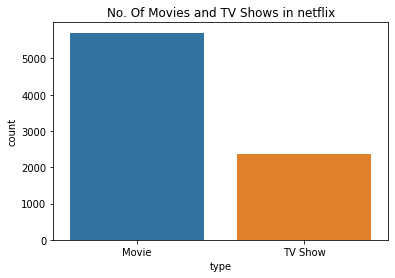

In [66]:
sns.countplot(data=net_df,x='type')
plt.title('No. Of Movies and TV Shows in netflix')
plt.show()

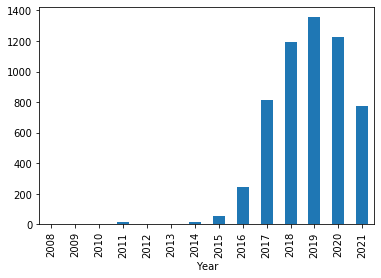

In [67]:
net_fl['Year']=net_fl['Year'].astype('int')
net_fl[net_fl['type']=='Movie'].groupby('Year')['type'].count().plot(kind='bar')
plt.show()

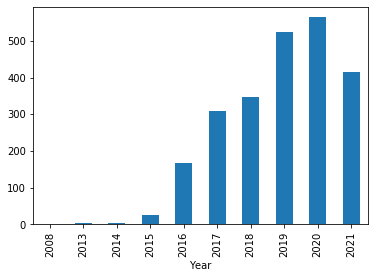

In [68]:
net_fl['Year']=net_fl['Year'].astype('int')
net_fl[net_fl['type']=='TV Show'].groupby('Year')['type'].count().plot(kind='bar')
plt.show()

From above we can see that there is a rapid increase in movies and TV Shows but after `2019` there is  a decrease in `Movies`, after `2020` there is decrease in `TV Shows`.

But compared to `TV Shows`, the decrease in `Movies` is more.

In [69]:

net_fl[net_fl['type']=='Movie']['Duration'].min()

3

In [70]:
net_fl[net_fl['type']=='Movie']['Duration'].max()

312

In [71]:
net_fl[net_fl['type']=='TV Show']['Duration'].min()

1

In [72]:
net_fl[net_fl['type']=='TV Show']['Duration'].max()

17

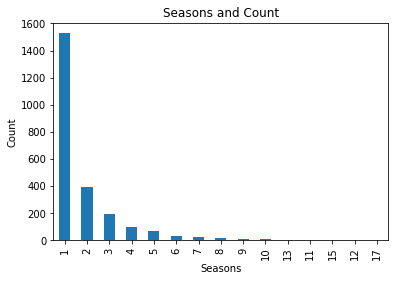

In [73]:
(net_fl[net_fl['type']=='TV Show']['Duration'].value_counts()).plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Seasons and Count')
plt.show()

From above graph we can see that as seasons increases the count of `TV Shows` also decreases.

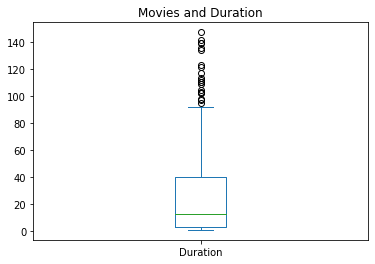

In [74]:
(net_fl[net_fl['type']=='Movie']['Duration'].value_counts()).plot(kind='box')
plt.title('Movies and Duration')
plt.show()

In [75]:
net_mov_dur=pd.DataFrame(net_fl[net_fl['type']=='Movie']['Duration'].value_counts())
net_mov_dur.reset_index(inplace=True)
net_mov_dur

,index,Duration
0,90,147
1,94,141
2,93,139
3,97,139
4,95,135
...,...,...
193,190,1
194,10,1
195,3,1
196,312,1


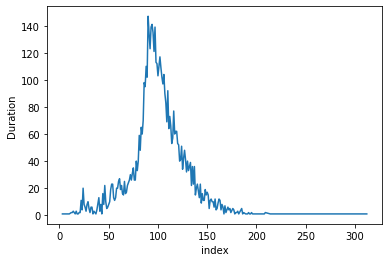

In [76]:
sns.lineplot(data=net_mov_dur,x='index', y='Duration')

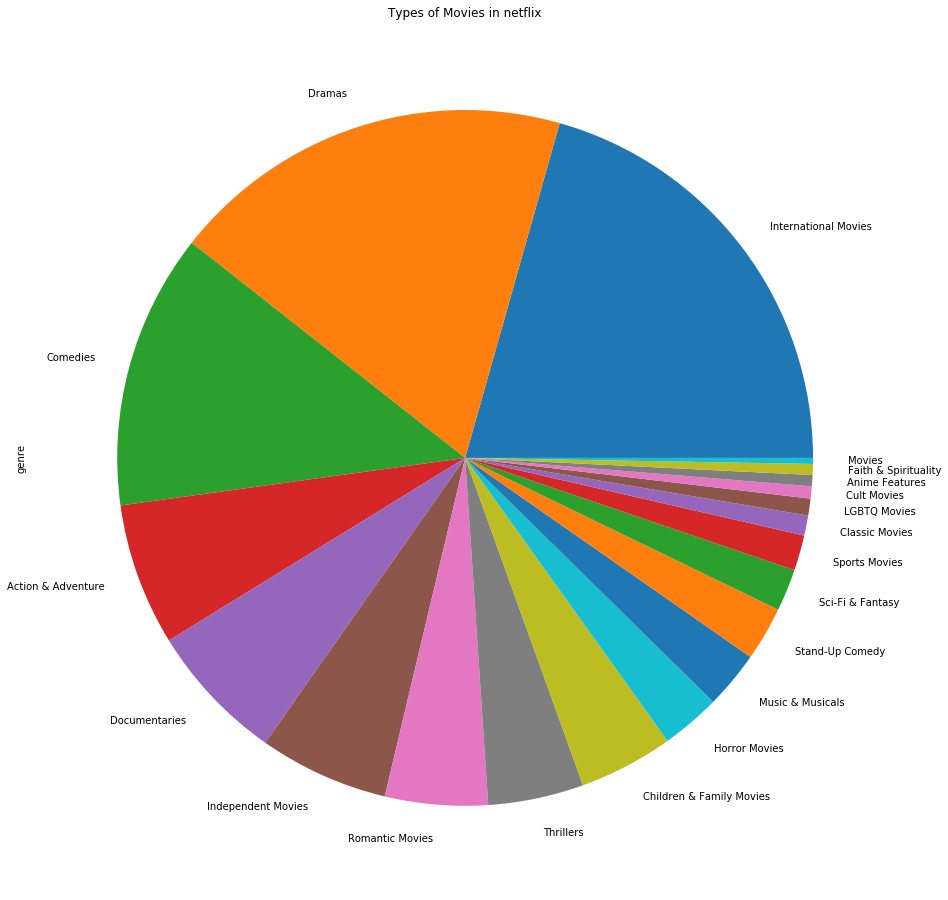

In [77]:
(net_genre_fl[net_genre_fl['type']=='Movie']['genre'].value_counts()).plot(kind='pie', figsize=(16,16))
plt.title('Types of Movies in netflix')
plt.show()

From above we can see that `Movies` from categories `Faith & Spirituality`, `Anime`, `cult` are less opted

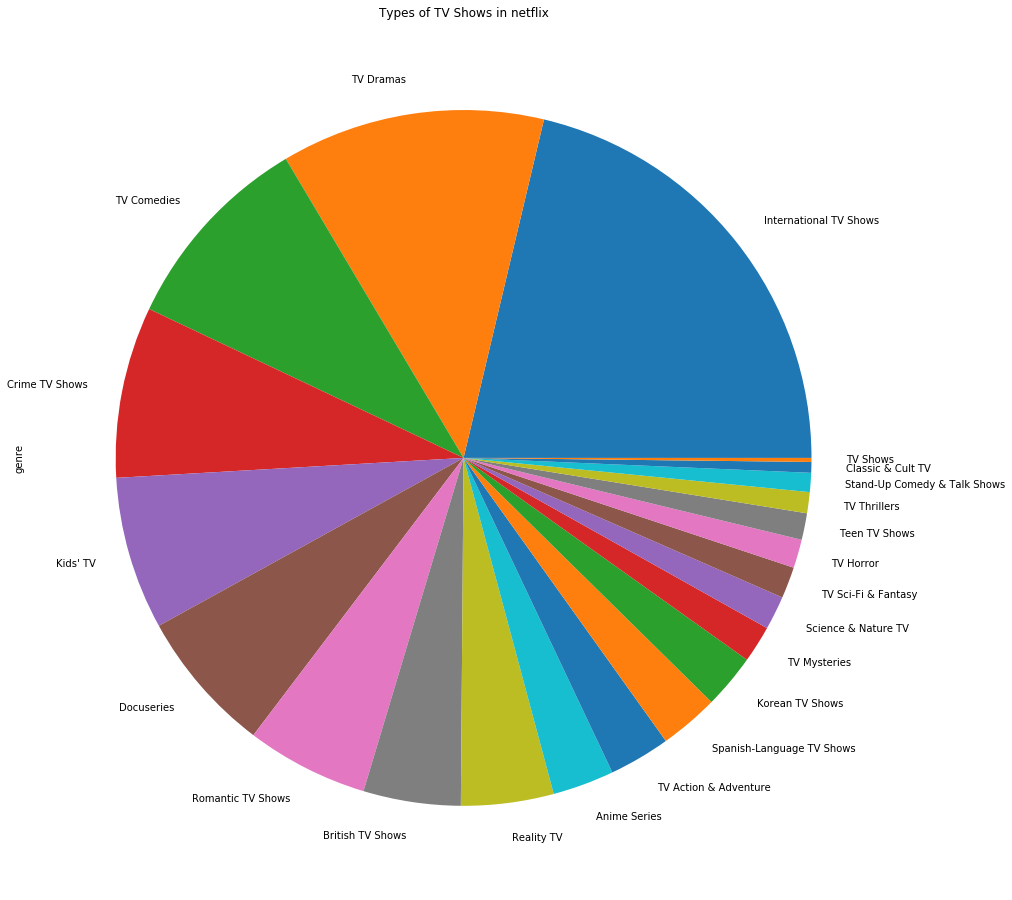

In [78]:
(net_genre_fl[net_genre_fl['type']=='TV Show']['genre'].value_counts()).plot(kind='pie', figsize=(16,16))
plt.title('Types of TV Shows in netflix')
plt.show()

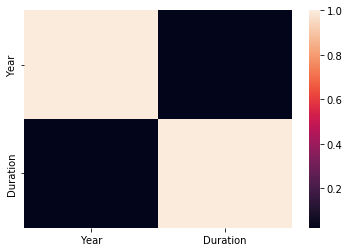

In [79]:
sns.heatmap(net_fl.corr())

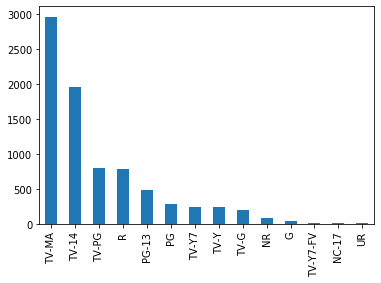

In [80]:
(net_df.rating.value_counts()).plot(kind='bar')

From Above we can see that the shows with rating `TV-MA` is popular

In [81]:
net_count_fl[net_count_fl['Country']=='India'].rating.value_counts()

TV-14       572
TV-MA       266
TV-PG       144
TV-Y7        17
PG-13        11
TV-G         10
PG            7
NR            7
TV-Y          6
R             5
TV-Y7-FV      1
Name: rating, dtype: int64

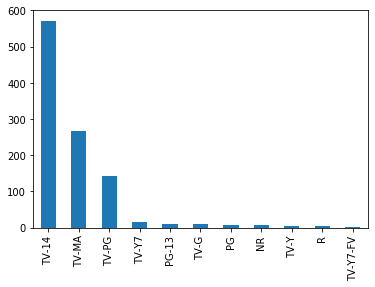

In [82]:
(net_count_fl[net_count_fl['Country']=='India'].rating.value_counts()).plot(kind='bar')
plt.show()

From Above we can see that the shows with rating `TV-14` are more popular in `India`

In [83]:
net_dir_fl['Director'].value_counts()

Marcus Raboy         881
Edward Cotterill     211
Toshiya Shinohara    167
Park Hoon-jung       152
Rajiv Chilaka        103
                    ... 
Kirsten Johnson        1
Theodore Melfi         1
Jeannot Szwarc         1
Joe Alves              1
James Ivory            1
Name: Director, Length: 4739, dtype: int64

In [84]:
net_count_fl[(net_count_fl['Country']=='India')&(net_count_fl['type']=='TV Show')]['director'].mode()

0    David Dhawan
dtype: object

In [85]:
net_count_fl[(net_count_fl['Country']=='India')&(net_count_fl['type']=='Movie')]['director'].mode()

0    David Dhawan
dtype: object

In [86]:
print(net_df[(net_df['director']=='David Dhawan')&(net_df['type']=='Movie')]['title'])

205           Kyo Kii... Main Jhuth Nahin Bolta
998                        Searching For Sheela
2270                            Chashme Baddoor
2334                              Seven (Tamil)
2869             Amit Tandon: Family Tandoncies
3196                                   Lakeeran
4187                                     Adhugo
4465                           Yeh Hai Bakrapur
5009                                   Judwaa 2
5295                      Chadi Jawani Budhe Nu
6440                             Chal Mere Bhai
6449                            Chashme Buddoor
6707                                 Ethirmarai
6907                                     Haapus
6936                       Haseena Maan Jaayegi
7144                                     Judwaa
7168                                     Kanika
7386                      Maine Pyaar Kyun Kiya
7524                       Mujhse Shaadi Karogi
7662    One Heart: The A.R. Rahman Concert Film
8647                Twisted Trunk, Big F

In [87]:
net_df[(net_df['director']=='David Dhawan')&(net_df['type']=='TV Show')]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8121                           Super Bheem
8173                             Thackeray
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 70, dtype: object

From Above we can see that Director `David Dhawan` has directed many `Movies` and `TV Shows` in India.

`David Dhawan` has directed a total of nearly `91` Shows i.e.., it includes both `Movies` and `TV Shows`.

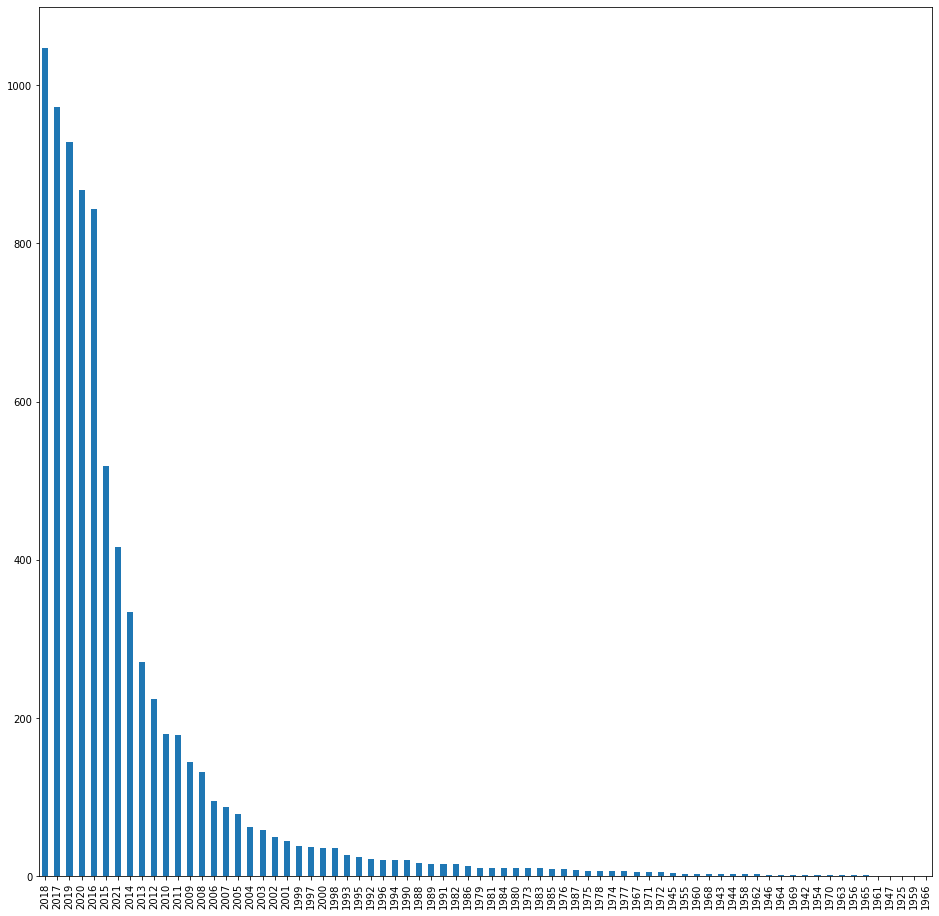

In [88]:
(net_fl['release_year'].value_counts()).plot(kind='bar',figsize=(16,16))
plt.show()

Recommendations:

1. There is a decrease in `TV Shows` and `Movies` in `2021`, but compared to `Movies`, decrease in `TV Shows` is `Less`. Hence, It is better to produce more `TV Shows`.

2. In `India`, `Movies` and `TV Shows` with rating `TV-14` are more popular. Hence, It is better to produce `Shows` with rating `TV-14`.

3. The `TV Shows` with `less` seasons are popular and their popularity also decreases as the number of seasons increases. Hence it is recommended to produce `TV Shows` with less seasons.

4. In India shows which are directed by `David Dhawan` are more popular. Hence, it is better to produce the `shows` directed by him.

5. It can be observed that shows which are added in `2018` are more popular. Hence, it is recommended to produce movies from year `2018`[The count may be decreased because of various factors like `covid` in `2019`, Hence there may be a decline in shows produced by netflix]

6. From above it can be seen that movies with `Duration`: `90-120` min is more popular.

7. From above it can be seen that `Shows` with `Genre` `International` is more popular followed by `Drama` and `Comedy`. Hence `Shows` with `Genre`: ['International','Drama','Comedy'] is better to be produced.

8. `Shows` with `Genre`:['Faith','cult'] are less popular. Hence, it is better to Produce these Genre as less as possible.